In [1]:
!gdown 1dk-7Va5L2JHr1Xwh-YCYfMeOdkU5sMui

Downloading...
From: https://drive.google.com/uc?id=1dk-7Va5L2JHr1Xwh-YCYfMeOdkU5sMui
To: C:\Users\tejas\Downloads\codes_tejas_final\Bike Data\train.csv

  0%|          | 0.00/648k [00:00<?, ?B/s]
 81%|########  | 524k/648k [00:00<00:00, 1.55MB/s]
100%|##########| 648k/648k [00:00<00:00, 1.90MB/s]


In [2]:
!gdown 1E_qa7Pqfb--xyevcs0ZaFLcxNjbPJEC2

Downloading...
From: https://drive.google.com/uc?id=1E_qa7Pqfb--xyevcs0ZaFLcxNjbPJEC2
To: C:\Users\tejas\Downloads\codes_tejas_final\Bike Data\test.csv

  0%|          | 0.00/324k [00:00<?, ?B/s]
100%|##########| 324k/324k [00:00<00:00, 1.87MB/s]
100%|##########| 324k/324k [00:00<00:00, 1.87MB/s]


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.svm import SVR

In [4]:
# Load the datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [5]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df_train.shape

(10886, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [11]:
df_test.shape

(6493, 9)

In [12]:
df_test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [13]:
# Parsing datetime for further feature extraction
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

# Extracting new features from datetime
df_train['hour'] = df_train['datetime'].dt.hour
df_train['day'] = df_train['datetime'].dt.day
df_train['month'] = df_train['datetime'].dt.month
df_train['year'] = df_train['datetime'].dt.year
df_train['dayofweek'] = df_train['datetime'].dt.dayofweek

df_test['hour'] = df_test['datetime'].dt.hour
df_test['day'] = df_test['datetime'].dt.day
df_test['month'] = df_test['datetime'].dt.month
df_test['year'] = df_test['datetime'].dt.year
df_test['dayofweek'] = df_test['datetime'].dt.dayofweek

# Scaling features
scaler = StandardScaler()
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'hour']
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])


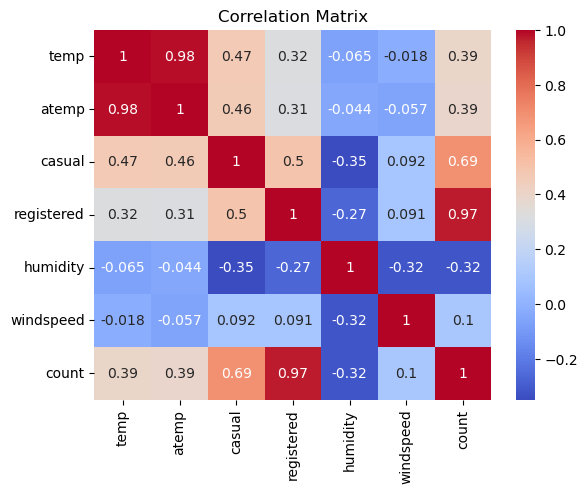

In [14]:
# Correlation heatmap
sns.heatmap(df_train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\tejas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


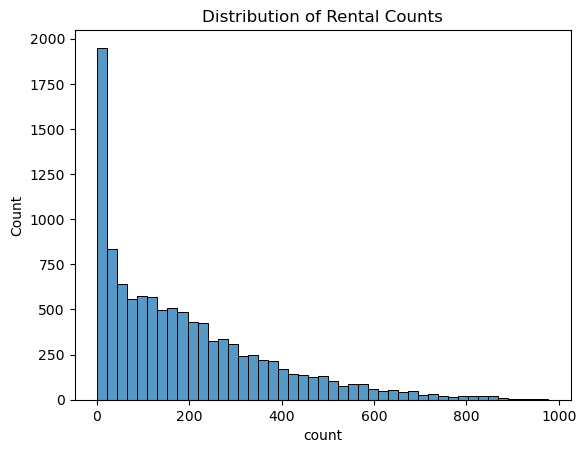

In [15]:
# Distribution of the target variable
sns.histplot(df_train['count'])
plt.title('Distribution of Rental Counts')
plt.show()

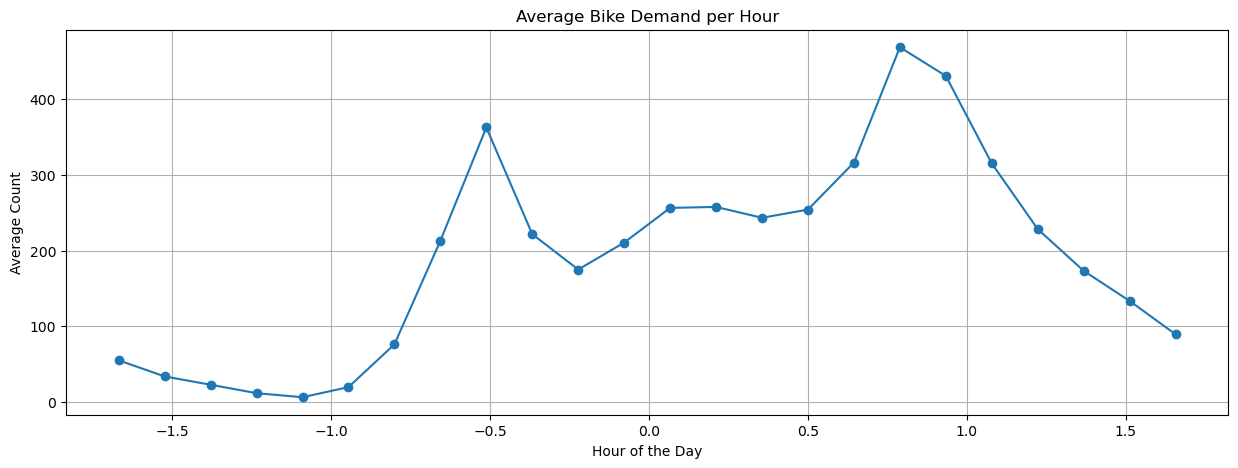

In [16]:
# Rentals over time
plt.figure(figsize=(15, 5))
plt.plot(df_train.groupby('hour')['count'].mean(), 'o-')
plt.title('Average Bike Demand per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.grid(True)
plt.show()

In [17]:
# Splitting data
X = df_train.drop(['count', 'datetime', 'casual', 'registered'], axis=1)
y = df_train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Implementing Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [18]:
# Metrics
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

Random Forest RMSE: 174.96599921707264
Random Forest MAE: 111.23980154355017


In [19]:
# Initialize and train SVM
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [20]:
# Metrics
print("SVM RMSE:", mean_squared_error(y_test, y_pred_svm, squared=False))
print("SVM MAE:", mean_absolute_error(y_test, y_pred_svm))

SVM RMSE: 199.07420518180945
SVM MAE: 138.12878442345158


SECOND IMPLEMENTATION

XGBoost for Random Forest

In [21]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Prepare the data (assuming df_train has already been preprocessed as per your snippet)
X = df_train.drop(['count', 'datetime', 'casual', 'registered'], axis=1)
y = df_train['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Metrics
print("XGBoost RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))


XGBoost RMSE: 66.74293536553304
XGBoost MAE: 46.74888555413889


NuSVR for Regression

In [22]:
from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Data already split and scaled as in your snippet
# It's crucial to scale features when using SVMs
svm_pipeline = make_pipeline(StandardScaler(), NuSVR(C=1.0, nu=0.1))

# Fit the model on the training data
svm_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_nusvr = svm_pipeline.predict(X_test)

# Evaluation metrics
print("NuSVR RMSE:", mean_squared_error(y_test, y_pred_nusvr, squared=False))
print("NuSVR MAE:", mean_absolute_error(y_test, y_pred_nusvr))


NuSVR RMSE: 187.7208089755112
NuSVR MAE: 164.88649474998377
